$$ 4𝑥_1+𝑥_2+𝑥_3+𝑥_5=6 $$
$$𝑥_1+3𝑥_2+𝑥_3+𝑥_4=6$$
$$x_1+𝑥_2+5𝑥_3−𝑥_4−𝑥_5=6$$
$$𝑥_2−𝑥_3+𝑥_4=6$$
$$𝑥_1−𝑥_3+4𝑥_5=6$$

### Tenemos la matriz de coeficiente:

$$\begin{bmatrix}
4 & 1 & 1 & 1 & 0 \\
1 & 3 & 1 & 1 & 0 \\
1 & 1 & 5 & 1 & 1 \\
1 & 1 & 1 & 0 & 0 \\
1 & 1 & 4 & 0 & 0 \\
\end{bmatrix}$$

### Vector de termino independientes


$$\begin{bmatrix}
6 \\
6 \\
6 \\ 
6 \\
6 \\
\end{bmatrix}$$

- Determinar si tiene, o no, solución. ¿Si la tiene, es única? Realice una breve explicación basándose en la teoría revisada.

In [1]:
import numpy as np

a = np.array([[4, 1, 1, 0, 1],[1, 3, 1, 1, 0],[1, 1, 5, -1, -1],[0, 1, -1, 1, 0],[1, 0, -1, 0, 4]])
b = np.array([6, 6, 6, 6, 6])
UniAB = np.column_stack([a,b])

deterA=np.linalg.det(a)
rangoA=np.linalg.matrix_rank(a)
MAumentadaAB=np.linalg.matrix_rank(a)
print("La Matriz |A| tiene una determinante de", deterA, "> 0")
print("El rango de la matriz [A] es :", rangoA, "=", "al rango de la matriz aumentada de [A|B]:", MAumentadaAB)
print("el numero de incognitas es:", len(b))

La Matriz |A| tiene una determinante de 45.000000000000014 > 0
El rango de la matriz [A] es : 5 = al rango de la matriz aumentada de [A|B]: 5
el numero de incognitas es: 5


la matriz $|A|$ son matrices cuadradas de coficientes siendo de **solucion unica**, porque el número de ecuaciones (que corresponde a los renglones) y el número de incógnitas (que corresponde a las
columnas) debe ser igual para que sea posible tener una **solución única**, en otras palabras la matriz $|A| > 0$ y el rango de $A$ es igual al número de incognitas $X_n = 5$. Chapra, Steven. Canale, Raymond (2007) Metodos numericos para ingenieros. pag 237.

Resolver  el  SEL  por  cada  uno  de  los siguientes métodos, realizando   una   descripción   detallada   de   cómo elaboró   el algoritmo:
- Gauss – Seidel
- Jacobi
- S.O.R.

###### METODO GAUSS - SEIDEL

In [2]:
g_xi = np.zeros((5,1), dtype=float)
g_x0 = np.zeros((5,1), dtype=float)
g_normaA = np.array([], dtype=float)
g_itr = 0
g_ea = 100.0
g_v_ea = []
sep = "\t"
n = len(a)
tol = 10**(-6)
print(1)
while float(np.linalg.norm(np.dot(a, g_xi)-b)) >= tol:
    g_itr = g_itr + 1
    
    for i in range(0, n):
        g_x0[i] = float(g_xi[i])
        g_xi[i] = float(b[i])/float(a[i][i])
        for j in range(0, n):
            if i != j:
                g_xi[i] = g_xi[i] - a[i][j] * g_xi[j] / a[i][i]              
        g_ea = float(abs((g_xi[i] - g_x0[i]) / g_xi[i])) * 100
        g_v_ea.append(g_ea)
    print("Iteracion n°:", g_itr) 
    print("Xi: ", g_xi.T)
    print("error: ", g_ea,"\n")        
        
       
        
        
    g_normaA = np.hstack([g_normaA,[float(np.linalg.norm(np.dot(a, g_xi)-b))]])

1
Iteracion n°: 1
Xi:  [[1.5   1.5   0.6   5.1   1.275]]
error:  100.0 

Iteracion n°: 2
Xi:  [[ 0.65625   -0.11875    2.3675     8.48625    1.9278125]]
error:  33.86286270059978 

Iteracion n°: 3
Xi:  [[ 0.45585938 -1.76986979  3.54561458 11.31548437  2.2724388 ]]
error:  15.165482202089922 

Iteracion n°: 4
Xi:  [[ 0.4879541  -3.11635102  4.44326402 13.55961504  2.48882748]]
error:  8.694402448253765 

Iteracion n°: 5
Xi:  [[ 0.54606488 -4.18298131  5.13707179 15.3200531   2.64775173]]
error:  6.002233760124784 

Iteracion n°: 6
Xi:  [[ 0.59953945 -5.01888811  5.6774307  16.69631881  2.76947281]]
error:  4.395099478048891 

Iteracion n°: 7
Xi:  [[ 0.64299615 -5.67224855  6.09900881 17.77125736  2.86400316]]
error:  3.3006371095959164 

Iteracion n°: 8
Xi:  [[ 0.67730915 -6.1825251   6.4280953  18.6106204   2.93769654]]
error:  2.5085427575478096 

Iteracion n°: 9
Xi:  [[ 0.70418332 -6.58096634  6.68501999 19.26598633  2.99520917]]
error:  1.9201540777446007 

Iteracion n°: 10
Xi:  [[

##### METODO JACOBI

In [3]:
j_xold = np.zeros((5,1), dtype = float)
j_xi = np.zeros((5,1), dtype = float)
j_n_a = []
j_n_a.append(float(np.linalg.norm(np.dot(a, j_xi) - b)))
j_itr = 0
j_ea = np.zeros((5,1), dtype = float)
mj_ea = np.array([], dtype = float)

while j_n_a[-1] >= tol:
    j_itr = j_itr + 1
    j_xold = j_xi
    j_xi = np.zeros((5,1), dtype=float)
    for i in range(0, n):
        for j in range(0, n):
            if i == j:
                j_xi[i] = j_xi[i] + b[i] / a[i][i]
            else:
                j_xi[i] = j_xi[i] - a[i][j] * j_xold[j] / a[i][i]
        j_ea[i] = abs((j_xi[i] - j_xold[i]) / j_xi[i]) * 100
    mj_ea = np.append(mj_ea, j_ea)
    j_n_a.append(float(np.linalg.norm(np.dot(a, j_xi) - b)))
    print("Iteracion n°: ", j_itr)    
    print("Xi: ", j_xi.T)
    print("el error de tolerancia es: ", j_n_a[-1],"\n")

Iteracion n°:  1
Xi:  [[1.5 2.  1.2 6.  1.5]]
el error de tolerancia es:  23.928017051147386 

Iteracion n°:  2
Xi:  [[ 0.325 -0.9    2.     5.2    1.425]]
el error de tolerancia es:  13.027255083094058 

Iteracion n°:  3
Xi:  [[ 0.86875    -0.50833333  2.64        8.9         1.91875   ]]
el error de tolerancia es:  13.5767410830987 

Iteracion n°:  4
Xi:  [[ 0.48739583 -2.13625     3.29166667  9.14833333  1.9428125 ]]
el error de tolerancia es:  7.951505998576577 

Iteracion n°:  5
Xi:  [[ 0.72544271 -2.30913194  3.748      11.42791667  2.20106771]]
el error de tolerancia es:  8.858775540502917 

Iteracion n°:  6
Xi:  [[ 0.59001606 -3.30045312  4.24253472 12.05713194  2.25563932]]
el error de tolerancia es:  5.939272719521198 

Iteracion n°:  7
Xi:  [[ 0.70056977 -3.62989424  4.60464167 13.54298785  2.41312967]]
el error de tolerancia es:  6.277490900590603 

Iteracion n°:  8
Xi:  [[ 0.65303073 -4.28273309  4.9770884  14.23453591  2.47601797]]
el error de tolerancia es:  4.7034951477

Iteracion n°:  111
Xi:  [[ 0.79999965 -7.9999894   7.59999262 21.59997965  3.19999801]]
el error de tolerancia es:  1.3938945437558909e-05 

Iteracion n°:  112
Xi:  [[ 0.79999969 -7.99999064  7.59999348 21.59998202  3.19999824]]
el error de tolerancia es:  1.2311890151398775e-05 

Iteracion n°:  113
Xi:  [[ 0.79999973 -7.99999173  7.59999424 21.59998412  3.19999845]]
el error de tolerancia es:  1.087475660356424e-05 

Iteracion n°:  114
Xi:  [[ 0.79999976 -7.9999927   7.59999491 21.59998597  3.19999863]]
el error de tolerancia es:  9.605375761525882e-06 

Iteracion n°:  115
Xi:  [[ 0.79999979 -7.99999355  7.59999551 21.59998761  3.19999879]]
el error de tolerancia es:  8.4841663089561e-06 

Iteracion n°:  116
Xi:  [[ 0.79999981 -7.9999943   7.59999603 21.59998906  3.19999893]]
el error de tolerancia es:  7.4938325910227465e-06 

Iteracion n°:  117
Xi:  [[ 0.79999984 -7.99999497  7.5999965  21.59999034  3.19999905]]
el error de tolerancia es:  6.619097836602596e-06 

Iteracion n°:  118


#### METODO DE S.O.R

In [4]:
import math as m

S_Xi = np.zeros((5,1), dtype=float)
S_X0 = np.zeros((5,1), dtype=float)
S_NormaA = np.array([], dtype=float)
S_itr = 0
S_Ea = 100.0
S_V_Ea = []
sep = "\t"
S_lambda = 1.4      

while float(np.linalg.norm(np.dot(a, S_Xi)-b)) >= tol:
    S_itr = S_itr + 1
    
    for i in range(0, n):
        S_X0[i] = float(S_Xi[i])
        S_Xi[i] = float(b[i])/float(a[i][i])
        for j in range(0, n):
            if i != j:
                S_Xi[i] = S_Xi[i] - a[i][j] * S_Xi[j] / a[i][i]              
        S_Xi[i] = S_lambda * S_Xi[i] + (1 - S_lambda) * S_X0[i]
        S_Ea = float(abs((S_Xi[i] - S_X0[i]) / S_Xi[i])) * 100        
        S_V_Ea.append(S_Ea)
        S_NormaA = np.hstack([S_NormaA,[float(np.linalg.norm(np.dot(a, S_Xi)-b))]])
    print("Iteracion n°:", S_itr)
    print("Xi: ", S_Xi.T)
    print("error: ", S_Ea,"\n")
        
    
   

Iteracion n°: 1
Xi:  [[2.1     1.82    0.5824  6.66736 1.56884]]
error:  100.0 

Iteracion n°: 2
Xi:  [[-0.129934   -1.25058547  4.13972145 13.27948568  2.96684341]]
error:  47.12090311505205 

Iteracion n°: 3
Xi:  [[ 0.10238081 -4.87650686  5.90983886 18.18908972  2.94587295]]
error:  0.7118587788528543 

Iteracion n°: 4
Xi:  [[ 0.66632594 -6.80651604  6.95310723 20.38783669  3.12202427]]
error:  5.642214904542866 

Iteracion n°: 5
Xi:  [[ 0.68945421 -7.55824605  7.40477989 21.19310163  3.20155428]]
error:  2.4841061895572403 

Iteracion n°: 6
Xi:  [[ 0.75738747 -7.87582711  7.5417548  21.50737402  3.19390685]]
error:  0.23943800573169152 

Iteracion n°: 7
Xi:  [[ 0.79610292 -7.97744397  7.59043222 21.59207705  3.20045251]]
error:  0.20452296841148268 

Iteracion n°: 8
Xi:  [[ 0.79685456 -7.9993922   7.60244593 21.60574256  3.20177597]]
error:  0.041335182531958614 

Iteracion n°: 9
Xi:  [[ 0.79956778 -8.00386271  7.6023294  21.60637193  3.20025618]]
error:  0.04748978397813871 

Iter

- Debe  establecer  los  criterios  de  convergencia  en  cada  método. Itere la solución hasta que ésta converja a una tolerancia de $‖𝐴‖≤10^{−6}$, donde $‖𝐴‖$ es una norma matricial para la matriz 𝐴(escoja la que considere más adecuada). Valide que el vector $𝑥$ es solución del SEL (mediante la operación $𝐴𝑥=𝑏$)

###### Prueba de la solución obtenida $A x_i=B$, por el método de Gauss – Seidel

In [5]:
a_inv = np.linalg.inv(a)
x = np.dot(a_inv, b)
print("Respuesta real X:     ", x)
print("Respuesta hallada Xi: ", g_xi.T)
print("***************************************************************************************************************")
s = np.dot(a, g_xi)
print("B: ", b.T)
print("Prueba A Xi = B:     ", s.T)
print("Norma Error =        ", g_normaA[-1])

Respuesta real X:      [ 0.8 -8.   7.6 21.6  3.2]
Respuesta hallada Xi:  [[ 0.79999997 -7.9999995   7.59999967 21.59999917  3.19999993]]
***************************************************************************************************************
B:  [6 6 6 6 6]
Prueba A Xi = B:      [[5.99999997 6.00000032 5.99999975 6.         6.        ]]
Norma Error =         9.237060990882992e-07


### - Prueba de la solución obtenida $AX_i=B$, por el método de Jacobi

In [6]:
Ainv = np.linalg.inv(a)
Xreal=np.dot(Ainv, b)
print("Respuesta real     X:", sep, Xreal)
print("Respuesta hallada Xi:", sep, j_xi.T)
print("***************************************************************************************************************")
S=np.dot(a, j_xi)
print("B: ", b.T)
print("Prueba AXi=B: ", S.T, sep, "Norma Error=", j_n_a[-1])

Respuesta real     X: 	 [ 0.8 -8.   7.6 21.6  3.2]
Respuesta hallada Xi: 	 [[ 0.79999998 -7.99999931  7.59999952 21.59999867  3.19999987]]
***************************************************************************************************************
B:  [6 6 6 6 6]
Prueba AXi=B:  [[5.99999999 6.00000024 5.99999972 5.99999985 5.99999994]] 	 Norma Error= 9.084809484218036e-07


### Prueba de la solución obtenida $AX_i=B$, por el método S.O.R. 

In [7]:
Ainv = np.linalg.inv(a)
Xreal = np.dot(Ainv, b)
print("Respuesta real     X:", sep, Xreal)
print("Respuesta hallada Xi:", sep, S_Xi.T)
print("**************************************************************************************************************")
S = np.dot(a, S_Xi)
print("B: ", b.T)
print("Prueba AXi = B: ", S.T, sep, "Norma Error = ", S_NormaA[-1])

Respuesta real     X: 	 [ 0.8 -8.   7.6 21.6  3.2]
Respuesta hallada Xi: 	 [[ 0.79999994 -7.99999973  7.59999987 21.59999972  3.19999999]]
**************************************************************************************************************
B:  [6 6 6 6 6]
Prueba AXi = B:  [[5.99999988 6.00000033 5.99999987 6.00000011 6.00000001]] 	 Norma Error =  8.795323486009251e-07


- Realizar una gráfica de la forma como va convergiendo la solución (Número  de  iteraciones  vs  norma  del  error).  Realice  una  breve explicación,  sustentándose  en  la  teoría  revisada,  acerca  de  los resultados. ¿Cuál considera que es el mejor método para elSEL seleccionado en particular? ¿por qué?

###### Gráfica de Convergencia método Gauss – Seidel. 

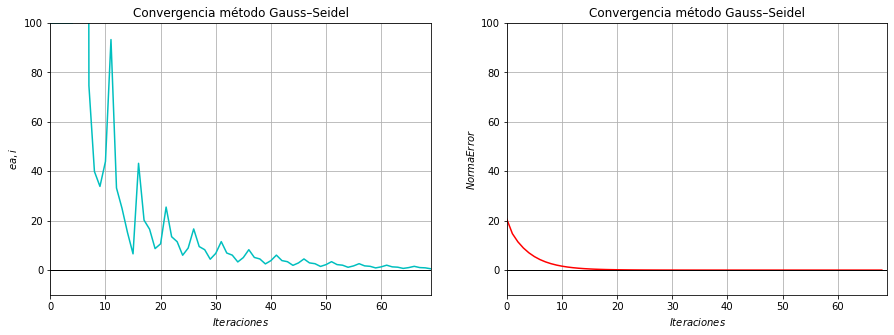

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,5)
ax[0].plot(g_v_ea, color="c")
ax[0].set_xlabel(r'$Iteraciones$')
ax[0].set_ylabel(r'$ea,i$')
ax[0].set_title(r'Convergencia método Gauss–Seidel')
ax[0].set_xlim(0, g_itr)
ax[0].set_ylim(-10, 100)
ax[0].axhline(0, color = "black", linewidth = 1, linestyle = "solid")
ax[0].grid(True)

ax[1].plot(g_normaA, color="r")
ax[1].set_xlabel(r'$Iteraciones$')
ax[1].set_ylabel(r'$Norma Error$')
ax[1].set_title(r'Convergencia método Gauss–Seidel')
ax[1].set_xlim(0, g_itr)
ax[1].set_ylim(-10, 100)
ax[1].axhline(0, color = "black", linewidth = 1, linestyle = "solid")
ax[1].grid(True)

plt.show()

##### Gráfica de Convergencia Método de Jacobi.

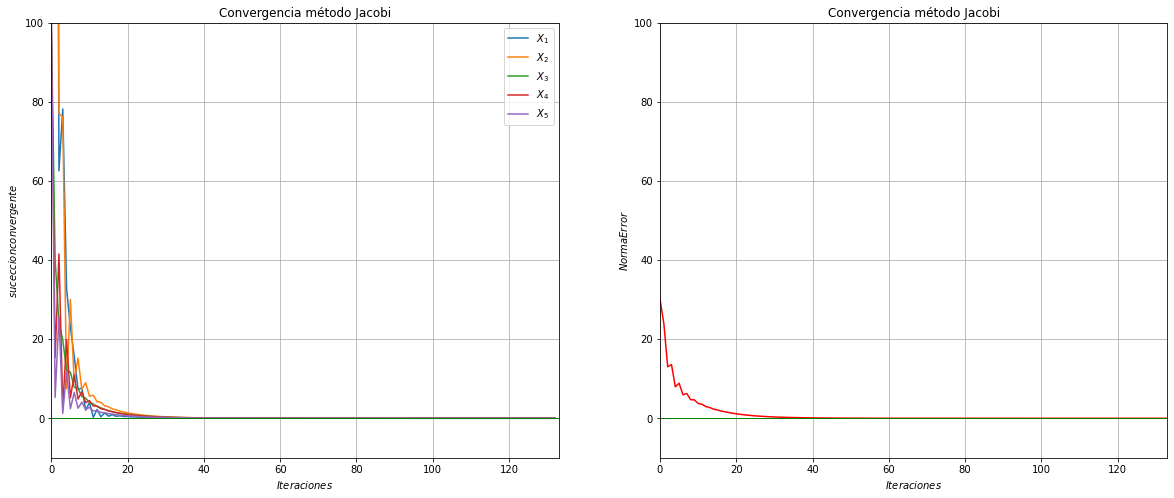

In [9]:
import matplotlib.pyplot as plt

LenMJ_Ea=len(mj_ea)

LJ_X1 = []
LJ_X2 = []
LJ_X3 = []
LJ_X4 = []
LJ_X5 = []

for i in range (0, LenMJ_Ea-1, 5):
    LJ_X1.append(mj_ea[i])
    LJ_X2.append(mj_ea[i+1])
    LJ_X3.append(mj_ea[i+2])
    LJ_X4.append(mj_ea[i+3])
    LJ_X5.append(mj_ea[i+4])

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20,8)

g1 = ax[0].plot(LJ_X1)
g1[0].set_label("$X_1$")
g2 = ax[0].plot(LJ_X2)
g2[0].set_label("$X_2$")
g3 = ax[0].plot(LJ_X3)
g3[0].set_label("$X_3$")
g4 = ax[0].plot(LJ_X4)
g4[0].set_label("$X_4$")
g5 = ax[0].plot(LJ_X5)
g5[0].set_label("$X_5$")
ax[0].set_xlabel(r'$Iteraciones$')
ax[0].set_ylabel(r'$suceccion convergente$')
ax[0].set_title(r'Convergencia método Jacobi')
ax[0].set_xlim(0, j_itr)
ax[0].set_ylim(-10,100)
ax[0].axhline(0, color = "g", linewidth = 1, linestyle = "solid")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(j_n_a, color="r")
ax[1].set_xlabel(r'$Iteraciones$')
ax[1].set_ylabel(r'$Norma Error$')
ax[1].set_title(r'Convergencia método Jacobi')
ax[1].set_xlim(0, j_itr)
ax[1].set_ylim(-10, 100)
ax[1].axhline(0, color = "g", linewidth = 1, linestyle = "solid")
ax[1].grid(True)

plt.show()

### - Gráfica de Convergencia método S.O.R.

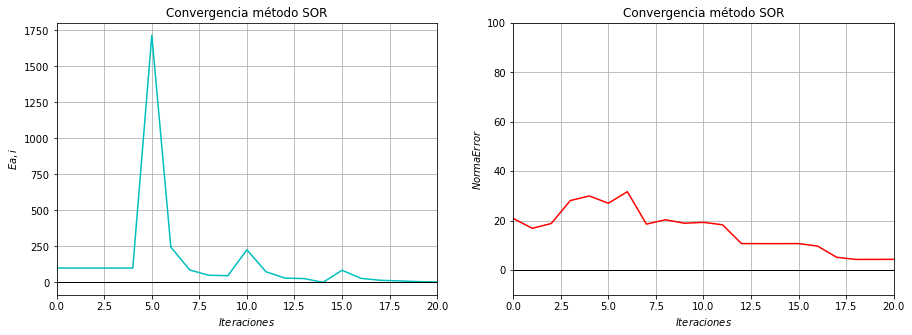

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,5)
ax[0].plot(S_V_Ea, color="c")
ax[0].set_xlabel(r'$Iteraciones$')
ax[0].set_ylabel(r'$Ea,i$')
ax[0].set_title(r'Convergencia método SOR')
ax[0].set_xlim(0, S_itr)
#ax[0].set_ylim(-10, 400)
ax[0].axhline(0, color = "black", linewidth = 1, linestyle = "solid")
ax[0].grid(True)

ax[1].plot(S_NormaA, color="r")
ax[1].set_xlabel(r'$Iteraciones$')
ax[1].set_ylabel(r'$Norma Error$')
ax[1].set_title(r'Convergencia método SOR')
ax[1].set_xlim(0, S_itr)
ax[1].set_ylim(-10, 100)
ax[1].axhline(0, color = "black", linewidth = 1, linestyle = "solid")
ax[1].grid(True)

plt.show()

- En  el  método  SOR  deberá  escoger  un  parámetro  de  relajación adecuado y justificar su selección.

# enlace del video https://youtu.be/bT7C9gWKVSM